#### Projekt PPA2

Zadáním projektu je vymyslet optimální strategii automatického nákupu a prodeje virtuální měny.  
Program má 4 části:  
1. Načtení dat z burzy  
2. Výpočet trendů popisujících vývoj ceny  
3. Uplatnění kritéria pro nákup a prodej  
4. Vykreslení grafu  
**Dodatek**
5. Nalezení optimální hranice pro parametr BAD_BUY pro maximální zisk
6. Nalezení optimální periodě pro parametr váženého průměru
  
**Načtení dat z burzy**  
Data načítám dynamicky ze webu cryptocompare.com  
  
**Výpočet trendů popisujících vývoj ceny**  
K výpočtům používám knihovnu pandas, která se často používá na analýzu dat a výrazně ulehčuje programátorovi práci.  
V analýze se snažím zjistit především 2 věci:  
  a) zda je aktuální cena vysoká nebo nízká  
  b) zda aktuální cenový trend stoupá či klesá  
Opírám se hlavně o funkce vážený průměr a exponenciální vážený průměr v určité periodě.  
  
**Uplatnění kritéria pro nákup a prodej**   
Kritérium pro nákup volím tak, že cena musí být nízká tedy podprůměrná (pod linkou "buy_line") a zároveň cenový trend musí být rostoucí. Kritérium pro prodej volím tak, že cena musí být vysoká tedy nadprůměrná (nad linkou "ema100") a trend musí být již klesající. Dále jsem přidal pojistku pro špatný nákup tj. pokud dojde ke nákupu a cena klesne o 10% prodávám se ztrátou. Program vypíše jednotlivé obchody a spočítá ztrátu či zisk.  
  
**Vykreslení grafu**  
Program vykreslí graf a barevně odliší trendy a vyznačí místa uskutečněných obchodů.   
  
**Nalezení optimální hranice pro parametr BAD_BUY pro maximální zisk**
Pokud proběhne signál BUY a cena začne klesat, je lepší smířit se s malou ztrátou, než riskovat velkou. Proto program při určitém poklesu ceny vyvolá signál SELL. Při hledání optimální hranice vycházím z 99% a sestupuji dolů až na 80%.
Optimální hodnota, kdy je zisk největší je kolem 96%. Viz graf níže.

**Nalezení optimální periody pro parametr váženého průměru**
Hodnota váženého průměru je stěžejní pro určení linie **buy_line**, což je linie oddělující vysokou cenu od nízké. Nad touto linií program nenakupuje. Při hledání optimální velikosti periody postupuji od 12 do 120 a opět vyhodnocuji ziskovost. Optimální hodnota je kolem 28.

#### Ovládání  
Program pracuje s částkou 5000 USD.  
Lze navolit libovolnou cryptoměnu, která je na webu cryptocompare.com podporovaná.  
Dále lze navolit i datum, odkdy se mají data zpracovávat a počet dat zpětně.  
  
#### Závěr  
Je třeba dodat, že v každé transakci je započten poplatek 0.25% z ceny obchodu.   
I tak se ale zdá, že obchodování je ziskové :) Pravděpodobně kvůli vysoké volatilitě a obecné růstovému trendu.  
  

read_data.. done 
Calculating optimal BAD BUY limit..
Optimal bad_buy_limit: 0.96% of buy price.
Calculating optimal rolling window size..
Optimal rolling_window: 28
Starts with:
Money = 5000 USD
Coins = 0 BTC
DateTime          ===  S    ---        USD   ---      Coin    Price in USD
2017-06-05 11:00  ===  +1   ---      0.000   ---     2.089   BUY:(2387.440)
2017-06-07 05:00  ===  -1   ---   5920.175   ---     0.000   SELL(2841.000)
2017-06-08 04:00  ===  +1   ---      0.000   ---     2.203   BUY:(2680.000)
2017-06-09 23:00  ===  -1   ---   6217.013   ---     0.000   SELL(2828.500)
2017-06-13 01:00  ===  +1   ---      0.000   ---     2.412   BUY:(2571.050)
2017-06-14 04:00  ===  -1   ---   6523.770   ---     0.000   SELL(2711.450)
2017-06-15 17:00  ===  +1   ---      0.000   ---     3.000   BUY:(2169.000)
2017-06-18 03:00  ===  -1   ---   7811.517   ---     0.000   SELL(2610.180)
2017-06-19 01:00  ===  +1   ---      0.000   ---     3.126   BUY:(2492.300)
2017-06-21 03:00  ===  -1   ---

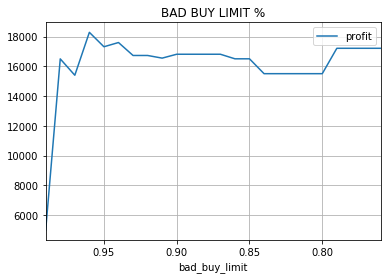

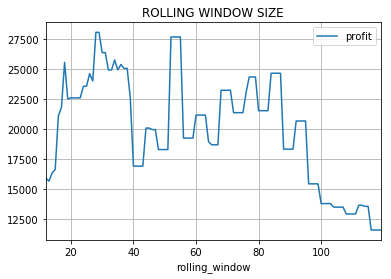

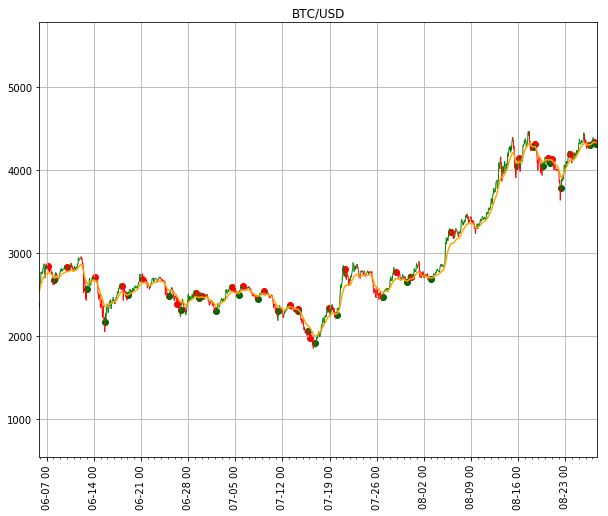

In [1]:
import json
import requests
import decimal
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from ots import OTS


dt_from = datetime.utcnow()
ots = OTS()
ots.start_from(dt_from)
